# Imports

In [1]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [2]:
#Uncomment if running on google collab
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [3]:
# TODO Change Path
#pthname = '/content/drive/MyDrive/ECS 171/Project/Sleep_health_and_lifestyle_dataset.csv'
pthname = 'Sleep_health_and_lifestyle_dataset.csv'

# Load Data and Data Cleaning

In [4]:
# Load Data
df = pd.read_csv(pthname)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Exploratory Data Analysis (EDA)

In [5]:
# Feature Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
# Get Feature Statistics
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
# Shape of Dataframe
df.shape

(374, 13)

# Preprocessing 

In [8]:
# Number of Missing Values
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

There are 219 nulls in the sleep disorder column, and the null value in the sleep disorder just means not a sleep disorder. Let's fill in "No Sleeping Disorder" instead of the null value.


In [9]:
# Null Values of Sleep Disorder to No Disorder
df['Sleep Disorder'].fillna("No Sleeping Disorder", inplace=True)
df.head()

/var/folders/5t/r8nrhmsj5xq04f1k1jhs9t300000gn/T/ipykernel_60766/590021986.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna("No Sleeping Disorder", inplace=True)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleeping Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleeping Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleeping Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
# Verification of No Missing Values
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [11]:
# Check for Duplications
df.duplicated().sum()

0

The dataset does not have duplicate and missing values. However, from the previous display, there are some labels that do not have numerical data. Let's convert these value into numerical data

In [12]:
# Get Names for Numerical and Categorical Columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print(f"Numerical Features: {numerical_columns}")
print(f"Categorical Features: {categorical_columns}")

Numerical Features: Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')
Categorical Features: Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')


In [13]:
# Convert Categorical into Numerical Representations
label_encoders = {}
for col in categorical_columns:
    if col == 'Blood Pressure': continue
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

for col in categorical_columns:
    if col == 'Blood Pressure': continue
    print(f"Mapping for column {col}:")
    for class_label, class_value in zip(label_encoders[col].classes_, range(len(label_encoders[col].classes_))):
        print(f"{class_value}: {class_label}")

Mapping for column Gender:
0: Female
1: Male
Mapping for column Occupation:
0: Accountant
1: Doctor
2: Engineer
3: Lawyer
4: Manager
5: Nurse
6: Sales Representative
7: Salesperson
8: Scientist
9: Software Engineer
10: Teacher
Mapping for column BMI Category:
0: Normal
1: Normal Weight
2: Obese
3: Overweight
Mapping for column Sleep Disorder:
0: Insomnia
1: No Sleeping Disorder
2: Sleep Apnea


Based on the numerical representation of categorical columns, one thing seen is a duplication in BMI Category as it has 'Normal' and 'Normal Weight.' Therefore, this needs to be fixed so that it is only one.

In [14]:
# Combine 'Normal Weight' with 'Normal' and Fix Mapping Accordingly
df['BMI Category'] = df['BMI Category'].replace({1: 0, 2: 2, 3: 3})
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,126/83,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
3,4,1,28,6,5.9,4,30,8,2,140/90,85,3000,2
4,5,1,28,6,5.9,4,30,8,2,140/90,85,3000,2


In [15]:
# Get Numerical Values of Blood Pressure (High and Low)
df[["High Blood Pressure", "Low Blood Pressure"]] = df["Blood Pressure"].str.split("/", expand=True).apply(pd.to_numeric)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,High Blood Pressure,Low Blood Pressure
0,1,1,27,9,6.1,6,42,6,3,126/83,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,1,125,80
3,4,1,28,6,5.9,4,30,8,2,140/90,85,3000,2,140,90
4,5,1,28,6,5.9,4,30,8,2,140/90,85,3000,2,140,90


**Drop Person ID**: Irrelevant when it comes to prediction of stress. Person ID does not say anything about a persons health.

In [16]:
df = df.drop(['Person ID', 'Blood Pressure'], axis=1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,High Blood Pressure,Low Blood Pressure
0,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90


In [17]:
# Dataframe Shape After Preprocessing:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
 11  High Blood Pressure      374 non-null    int64  
 12  Low Blood Pressure       374 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 38.1 KB


# Visualization

In [18]:
# Get Column Names
feature_names = df.columns
print(feature_names)

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'High Blood Pressure',
       'Low Blood Pressure'],
      dtype='object')


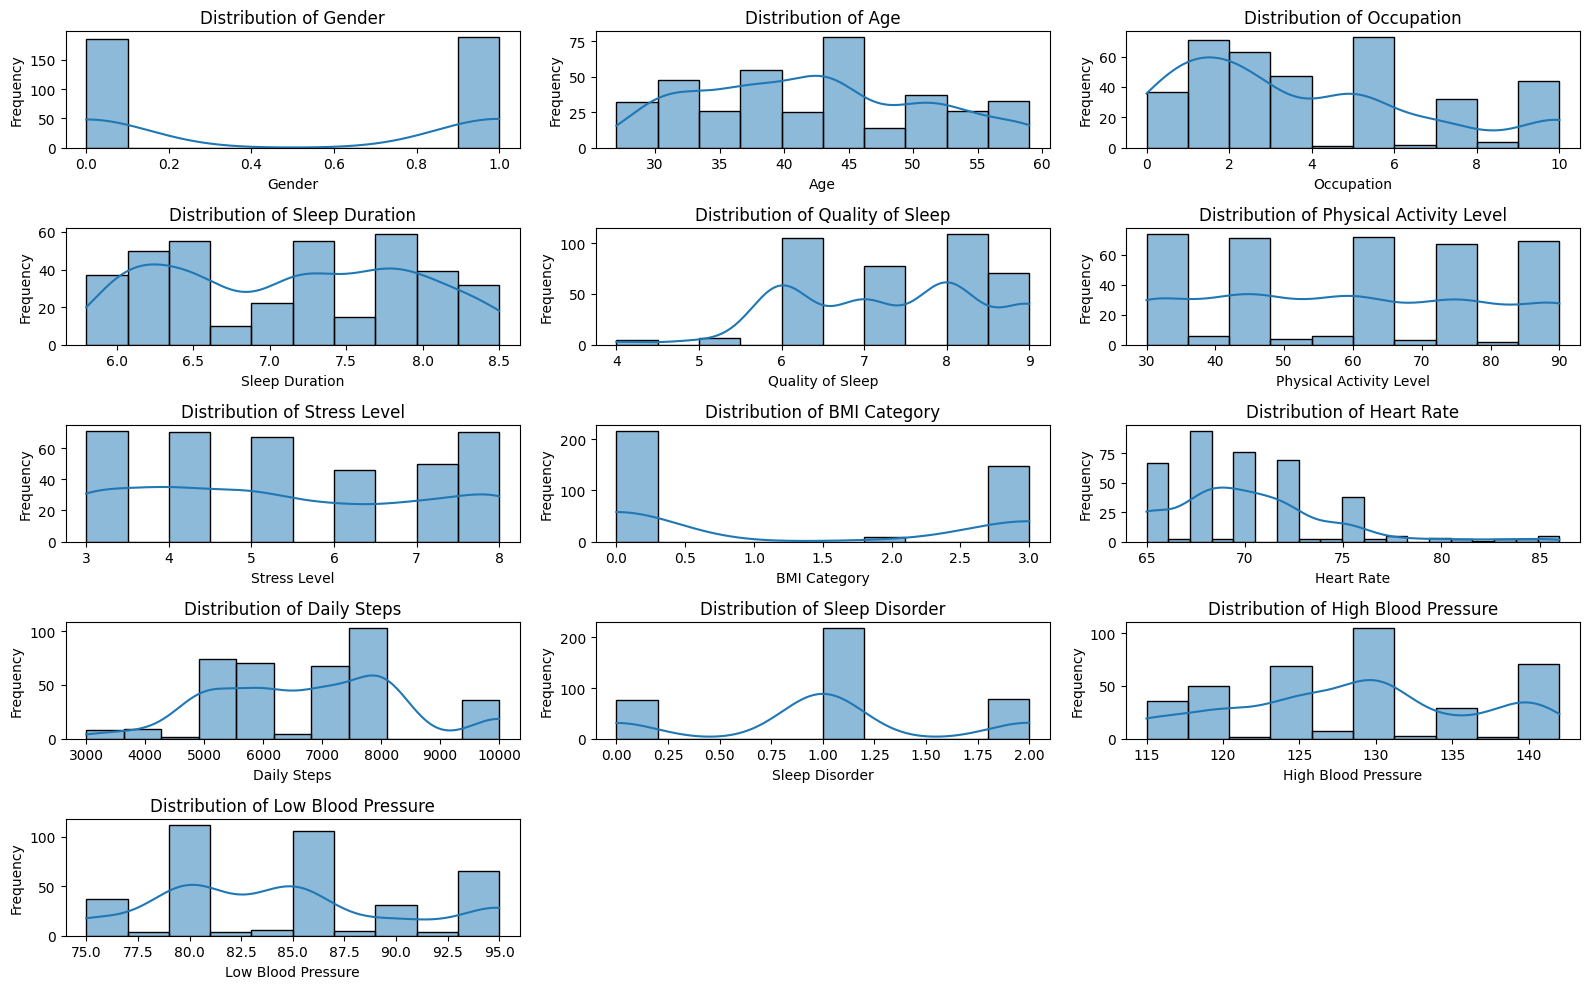

In [19]:
# Print Distribution of Each Feature
plt.figure(figsize=(16,10))
for i, col in enumerate(feature_names, 1):
  plt.subplot(5, 3, i)
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

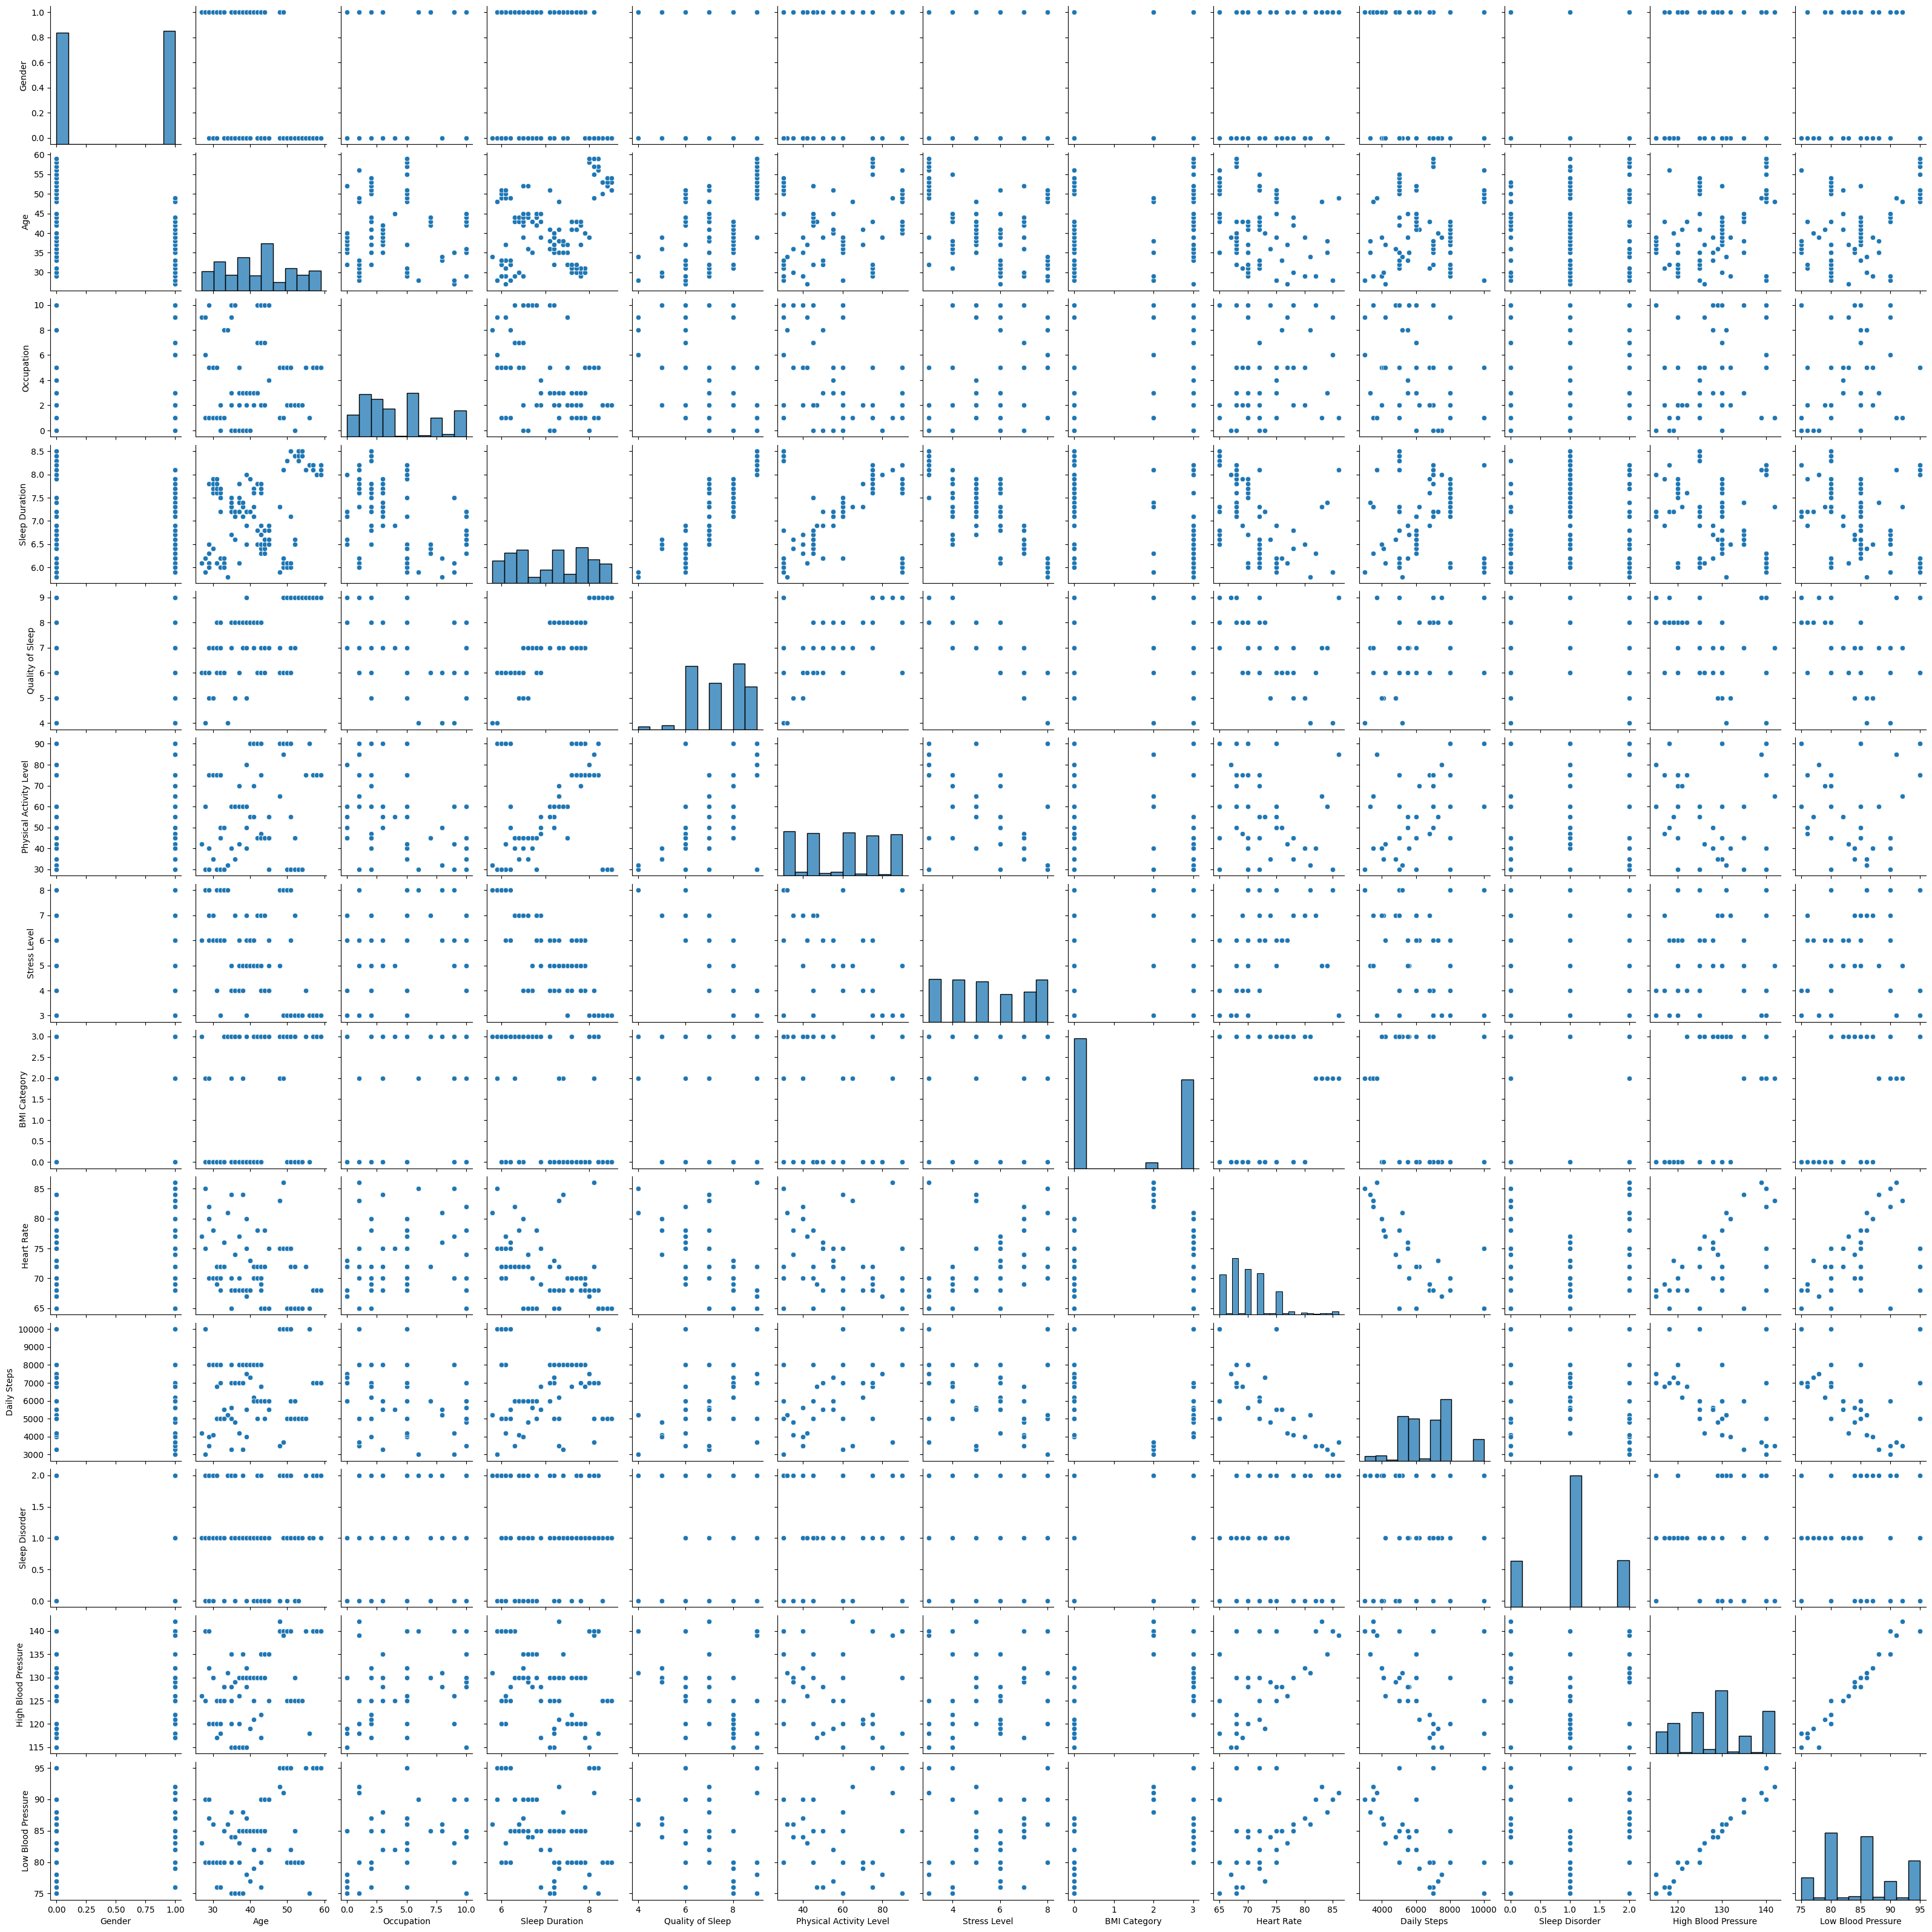

In [20]:
# Show Relationship Between Features
sns.pairplot(df[df.columns])
plt.show()

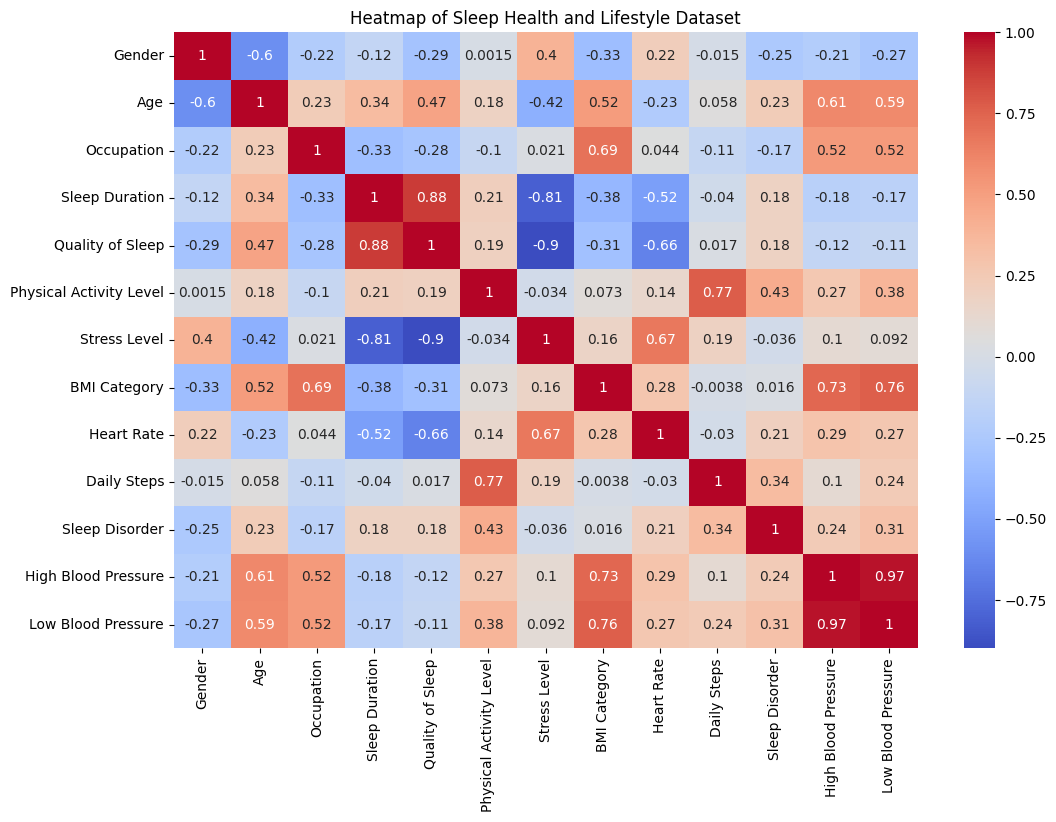

In [21]:
# Show Feature Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Sleep Health and Lifestyle Dataset')
plt.show()

Let Correlation coefficient Btwn 0.2 to 1.0 with Stree Level as realtively strong correlation:

correlation: 

[Gender, Age, Sleep Duration, Quality of Sleep, Stress Level, Heart Rate, Daily Steps]

In [22]:
# Drop Low Correlation Value
low_correlation_columns = ['Sleep Disorder', 'Physical Activity Level', 'High Blood Pressure', 'Low Blood Pressure', 'Occupation', 'BMI Category']
df.drop(low_correlation_columns, axis=1, inplace=True)
df.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,7.132086,7.312834,5.385027,70.165775,6816.844920
std,0.500641,8.673133,0.795657,1.196956,1.774526,4.135676,1617.915679
min,0.000000,27.000000,5.800000,4.000000,3.000000,65.000000,3000.000000
25%,0.000000,35.250000,6.400000,6.000000,4.000000,68.000000,5600.000000
50%,1.000000,43.000000,7.200000,7.000000,5.000000,70.000000,7000.000000
75%,1.000000,50.000000,7.800000,8.000000,7.000000,72.000000,8000.000000
max,1.000000,59.000000,8.500000,9.000000,8.000000,86.000000,10000.000000


# Models

In [23]:
# Split Dataset into Training and Testing Datasets
y = df['Stress Level']
X = df.drop(['Stress Level'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree

In [24]:
# Create Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='entropy')

# Train Tree Classifier
decision_tree.fit(X_train, y_train)

# Make Predictions on Test Set
y_pred = decision_tree.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f"MSE: {mse}")

# Save Model
joblib.dump(decision_tree, 'DecisionTreeModel.joblib')

Accuracy: 0.9734513274336283
MSE: 0.05309734513274336


['DecisionTreeModel.joblib']

Decision Rules: 
|--- Quality of Sleep <= 6.50
|   |--- Sleep Duration <= 6.25
|   |   |--- Heart Rate <= 75.50
|   |   |   |--- class: 8
|   |   |--- Heart Rate >  75.50
|   |   |   |--- Heart Rate <= 79.00
|   |   |   |   |--- class: 6
|   |   |   |--- Heart Rate >  79.00
|   |   |   |   |--- class: 8
|   |--- Sleep Duration >  6.25
|   |   |--- class: 7
|--- Quality of Sleep >  6.50
|   |--- Quality of Sleep <= 8.50
|   |   |--- Daily Steps <= 7150.00
|   |   |   |--- Heart Rate <= 69.50
|   |   |   |   |--- Age <= 44.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- Age >  44.50
|   |   |   |   |   |--- Sleep Duration <= 6.70
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- Sleep Duration >  6.70
|   |   |   |   |   |   |--- class: 6
|   |   |   |--- Heart Rate >  69.50
|   |   |   |   |--- Sleep Duration <= 6.85
|   |   |   |   |   |--- Heart Rate <= 71.00
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- Heart Rate >  71.00
|   |   |   |   |   |

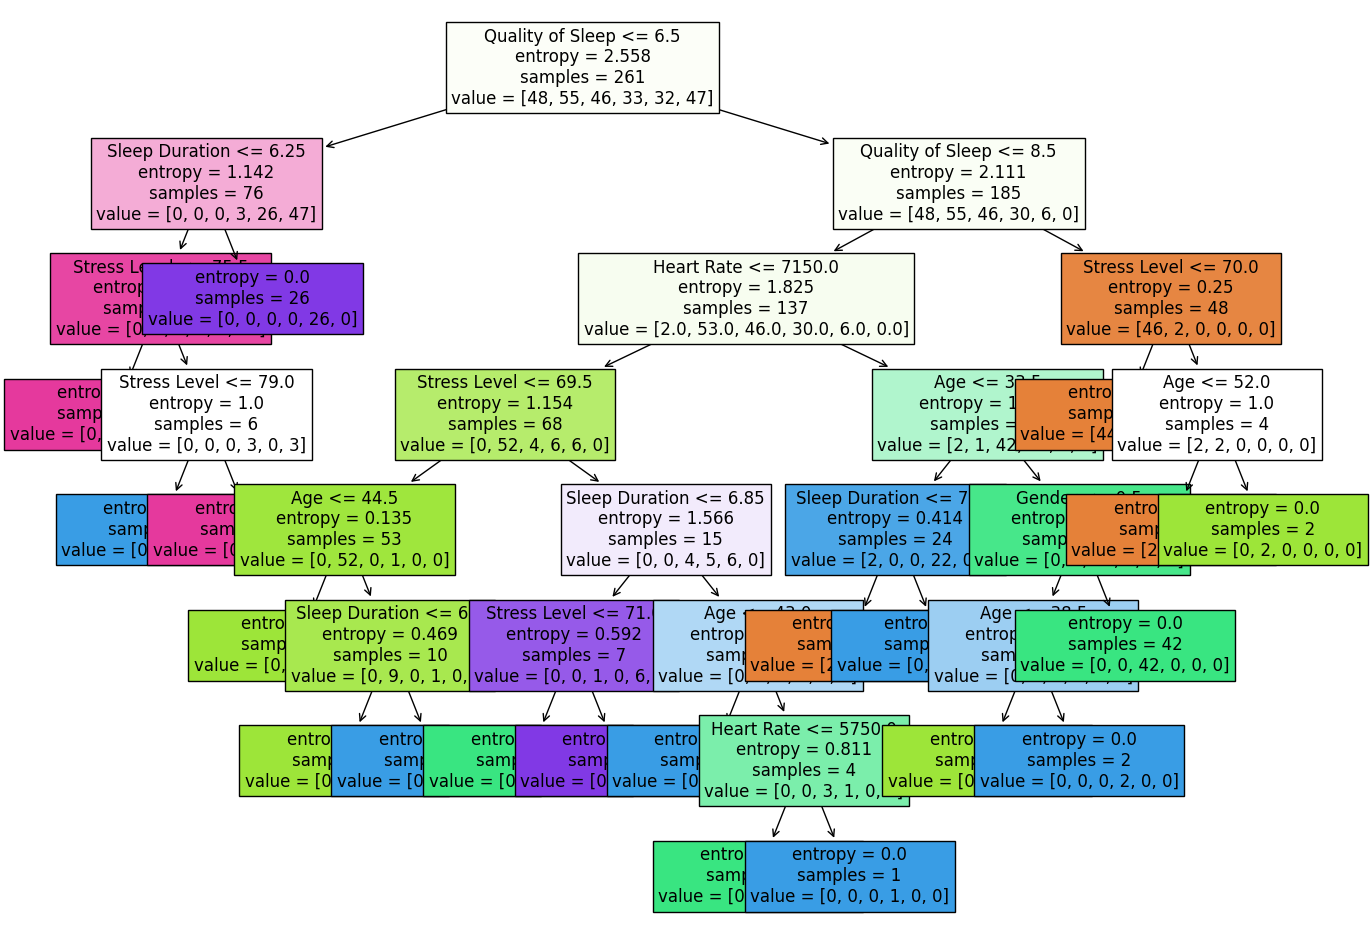

In [25]:
# Extract Decision Rules
decision_rules = export_text(decision_tree, feature_names=list(X.columns))
print(f'Decision Rules: \n{decision_rules}')

# Visualize Tree
fig = plt.figure(figsize=(16,12))
plot = plot_tree(decision_tree, feature_names=df.columns, fontsize=12, filled=True)

## Linear Regression

In [26]:
# Create Linear Regression
model = LinearRegression()

# Train Linear Regression Model
model.fit(X_train, y_train)

# Predict Testing Dataset
y_pred = model.predict(X_test)

# Calculate and Print Accuracy Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Coefficients: {model.coef_}')
print(f'Coefficient of Determination: {r2}' )
print(f"MSE: {mse}")

# Save Model
joblib.dump(model, 'LinearRegressionModel.joblib')

Coefficients: [ 7.23113861e-01  1.84133594e-02 -3.43520714e-01 -9.50057876e-01
  7.14403811e-02  2.16258152e-04]
Coefficient of Determination: 0.9017024587806524
MSE: 0.32207475366395677


['LinearRegressionModel.joblib']

## Random Forest

In [27]:
# Create Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Train Random Forest Regressor
regressor.fit(X_train, y_train)

# Predict Using Testing Dataset
predictions = regressor.predict(X_test)

# Calculate and Print Accuracy Metrics
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

# Save Model
joblib.dump(regressor, 'RandomForestModel.joblib')

Mean Squared Error: 0.06336283185840706
R-squared: 0.9806615995028443


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


['RandomForestModel.joblib']

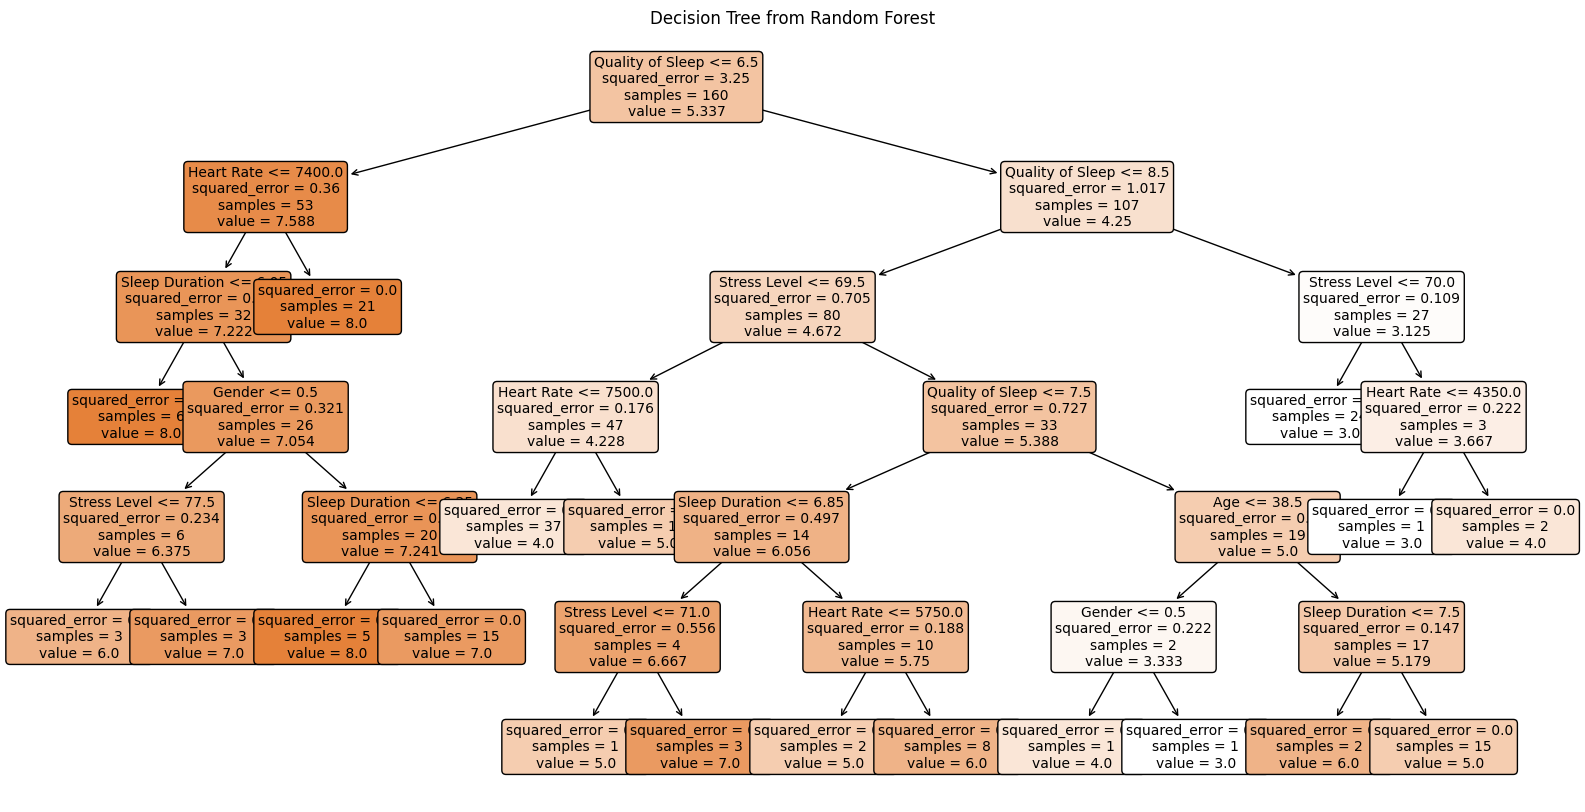

In [28]:
# Plot the decision tree
tree_to_plot = regressor.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

## Naive Bayes

In [29]:
# Build a Gaussian Classifier
bayes = GaussianNB()

# Training Model
bayes.fit(X_train, y_train)

# Predict Using Test Dataset
y_pred_bayes = bayes.predict(X_test)

# Calculate and Print the Accuracy
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
mse = mean_squared_error(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy_bayes:.2f}")
print(f"MSE: {mse}")

# Save Model
joblib.dump(bayes, 'NaiveBayesModel.joblib')

Naive Bayes Accuracy: 0.93
MSE: 0.32207475366395677


['NaiveBayesModel.joblib']